In [1]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving House.png to House.png


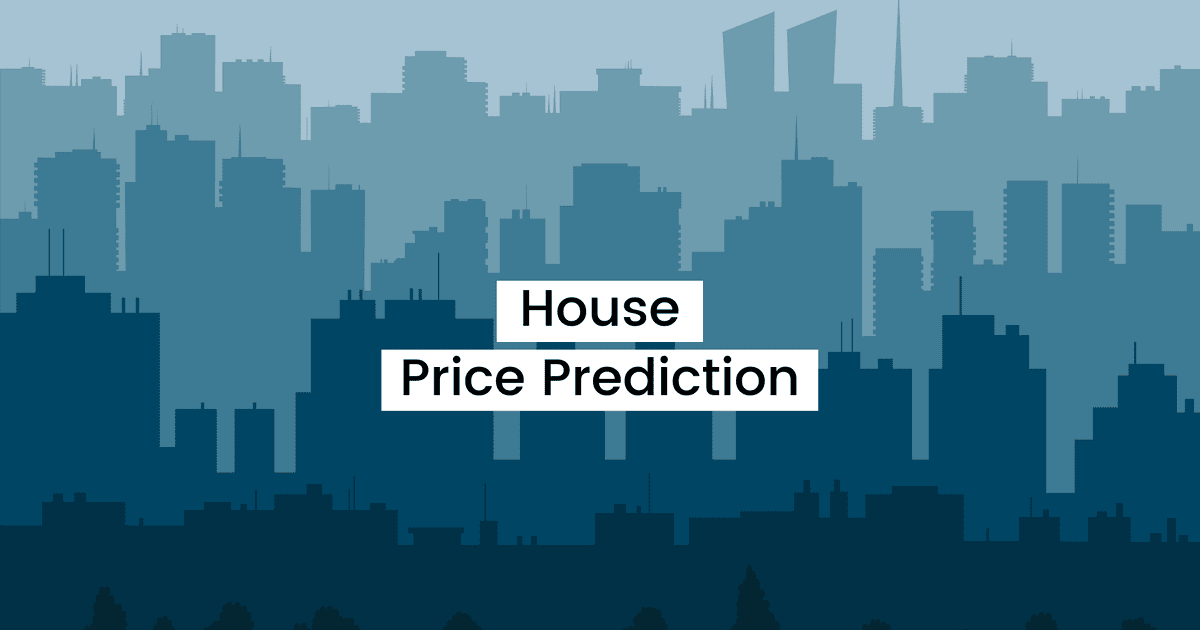

In [2]:
Image("House.png", width= 1000)

#Project Description / Background:

Due to the fact that I was born and raised in a large city, I have seen how the city grows and how housing costs increase as a result of local amenity availability. This was my driving force behind compiling a dataset for analysis.

Let's now explore the elements that influence pricing!

Every day, thousands of homes are sold. Every buyer has some internal concerns, such as: What is the true value of this house? Am I receiving a decent value?? In this study, a machine learning model is suggested to forecast the price of a home using information about the home (its size, location, Bedrooms, etc.). I will display the code used for each step of the creation and assessment of our model, followed by its results. This will make our work easier to reproduce. The Python programming language and a variety of Python packages will be used in this study.

## Goals of the Study :

The following are the study's primary goals:

• To use data preparation and pre-processing methods to obtain clean data.

• To create machine learning models that can forecast home prices based on attributes
of the home.

• In order to compare and evaluate model performance and select the best model.



##Google Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

## ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore')

# Import the dataset

In [ ]:
# Loading the train set
mumbai_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Mumbai.csv')
chennai_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Chennai.csv')
kolkata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Kolkata.csv')
hydrabad_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Hyderabad.csv')
banglore_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Bangalore.csv')
delhi_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Prices in Metropolitan Areas of India/Delhi.csv')

In [ ]:
# Shapes of the dataframes
print('Shape of Mumbai data:',mumbai_df.shape)
print('Shape of Chennai data:', chennai_df.shape)
print('Shape of Kolkata data:', kolkata_df.shape)
print('Shape of Hyderabad data:', hydrabad_df.shape)
print('Shape of Bangalore data:', banglore_df.shape)
print('Shape of Delhi data:', delhi_df.shape)

Shape of Mumbai data: (7719, 40)
Shape of Chennai data: (5014, 40)
Shape of Kolkata data: (6507, 40)
Shape of Hyderabad data: (2518, 40)
Shape of Bangalore data: (6207, 40)
Shape of Delhi data: (4998, 40)


In [ ]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
chennai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
kolkata_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
hydrabad_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
banglore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
delhi_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combining Datasets

In [ ]:
#Concating all the dataset into single dataset.
final_df = pd.concat([mumbai_df,chennai_df,kolkata_df,hydrabad_df,banglore_df,delhi_df], ignore_index=True)

In [ ]:
final_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


# Descriptive analysis of the dataset

In [ ]:
print('\nInformation of the dataset...... \n')
print(final_df.info())
print('\nStatistically infomation of the dataset......\n', final_df.describe())


Information of the dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM              

In [ ]:
final_df.shape

(32963, 40)

# Checking Missing Values

As we can see it is showing that we don't have any null values but from the columns

we can understand missing values are in the form of number 9 as it doesn't make any sense in the dataset,
we will consider 9 as nan value and replace it.

In [ ]:
final_df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [ ]:
final_df['No. of Bedrooms'].value_counts()


2    14263
3    12596
1     3857
4     1983
5      214
6       33
7        9
8        7
9        1
Name: No. of Bedrooms, dtype: int64

In [ ]:
# Donot run this cell twice
x = final_df.drop(['No. of Bedrooms'], axis=1)
#x.head()

In [ ]:
x.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,0,0,1,0,1,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
y = pd.DataFrame(final_df['No. of Bedrooms'])
y

,No. of Bedrooms
0,1
1,1
2,1
3,1
4,1
...,...
32958,2
32959,2
32960,1
32961,1


### Null Data seems to be marked as '9' so we'll replace 9 with NaN

In [ ]:
# Checking Null Values
x.replace(9, np.nan, inplace=True)
x.isna().sum()

Price                      0
Area                       0
Location                   0
Resale                     0
MaintenanceStaff       22870
Gymnasium              22870
SwimmingPool           22870
LandscapedGardens      22870
JoggingTrack           22870
RainWaterHarvesting    22870
IndoorGames            22870
ShoppingMall           22870
Intercom               22870
SportsFacility         22870
ATM                    22870
ClubHouse              22870
School                 22870
24X7Security           22870
PowerBackup            22870
CarParking             22870
StaffQuarter           22870
Cafeteria              22870
MultipurposeRoom       22870
Hospital               22870
WashingMachine         22870
Gasconnection          22870
AC                     22870
Wifi                   22870
Children'splayarea     22870
LiftAvailable          22870
BED                    22870
VaastuCompliant        22870
Microwave              22870
GolfCourse             22870
TV            

In [ ]:
# Concating 'No. of Bedrooms' columns back to the dataframe.
final_df = pd.concat([x,y], axis=1)

In [ ]:
final_df.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,No. of Bedrooms
0,4850000,720,Kharghar,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4500000,600,Kharghar,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6700000,650,Kharghar,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4500000,650,Kharghar,1,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,5000000,665,Kharghar,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
final_df.shape

(32963, 40)

In [ ]:
# missing_values percentage

from pandas.core.groupby.grouper import final

missing_values = pd.DataFrame(final_df.isnull().sum() * 100 / len(final_df))
missing_values.columns = ["Missing Values"]

missing_values = missing_values[missing_values["Missing Values"] != 0]
missing_values.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

missing_values

,Missing Values
MaintenanceStaff,69.380821
BED,69.380821
WashingMachine,69.380821
Gasconnection,69.380821
AC,69.380821
Wifi,69.380821
Children'splayarea,69.380821
LiftAvailable,69.380821
VaastuCompliant,69.380821
MultipurposeRoom,69.380821


In [ ]:
# Dropping all the NA values row-wise.
final_df.dropna(inplace=True)

## Treating Duplicates value

In [ ]:
# Printing duplicate values in the dataset
print(len(final_df[final_df.duplicated()]))

1867


In [ ]:
final_df = final_df.drop_duplicates()

In [ ]:
final_df.shape

(8226, 40)

# EDA

In [ ]:
# Exploring the dataset
Price = final_df.groupby('Price')['Price'].agg('count').sort_values(ascending=False)
Price

Price
4500000      108
5500000       98
3500000       88
4000000       87
11000000      84
            ... 
4021000        1
4025000        1
6374000        1
4031000        1
400000000      1
Name: Price, Length: 2467, dtype: int64

In [ ]:
# Exploring the dataset
Area = final_df.groupby('Area')['Area'].agg('count').sort_values(ascending=False)
Area

Area
1800    160
1000    149
1200    139
900     133
1100    132
       ... 
1508      1
1514      1
1516      1
1517      1
9900      1
Name: Area, Length: 1605, dtype: int64

In [ ]:
# Exploring the dataset
Bedrooms = final_df.groupby('No. of Bedrooms')['No. of Bedrooms'].agg('count').sort_values(ascending=False)
Bedrooms

No. of Bedrooms
3    3476
2    3471
1     708
4     523
5      42
6       4
8       2
Name: No. of Bedrooms, dtype: int64

# ***Data Visualization***

In [ ]:
def two_plot(x, title):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(x, ax=ax[0])
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

### Main Features of the dataset

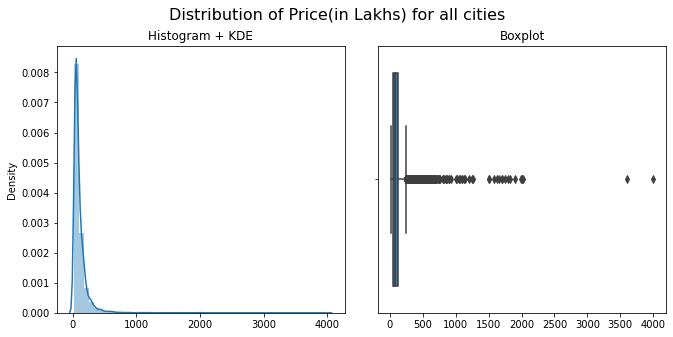

In [ ]:
two_plot(final_df['Price']/100000,'Distribution of Price(in Lakhs) for all cities')

Most of the value in Price Column lie between the rangef 0-350, and we have alot of outlier which lies outside of the upperbound range 350, which we will treat in later part.

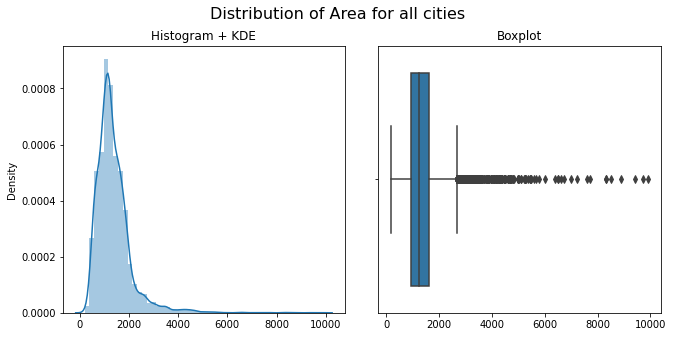

In [ ]:
two_plot(final_df['Area'],'Distribution of Area for all cities')

In this graph, we can see that our most of the Area value is in range of 0-3000 and beyond the limit of 3000 we have many outlier which we will treat later.

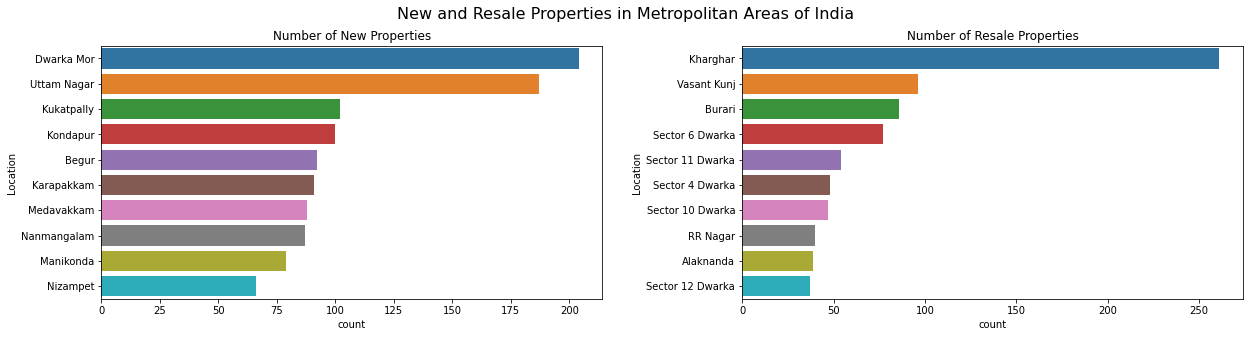

In [ ]:
df1 = final_df[final_df['Resale']== 0]
df2 = final_df[final_df['Resale']== 1]
fig, ax = plt.subplots(1,2,figsize=(18, 5))
ax[0]=sns.countplot(y='Location', data=df1, order=df1.Location.value_counts().index[:10],ax=ax[0])
ax[0].set_title('Number of New Properties')
ax[1]=sns.countplot(y='Location', data=df2, order=df2.Location.value_counts().index[:10],ax=ax[1])
ax[1].set_title('Number of Resale Properties')
fig.suptitle("New and Resale Properties in Metropolitan Areas of India", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

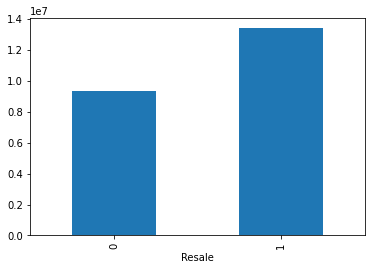

In [ ]:
# Bar graph for mean price of resale value
final_df.groupby('Resale')['Price'].mean().plot(kind='bar')

Plotting a bar graph for the mean price of the resale value. So we can state that our Resale(1) property value is more than Non-resale(0) property value

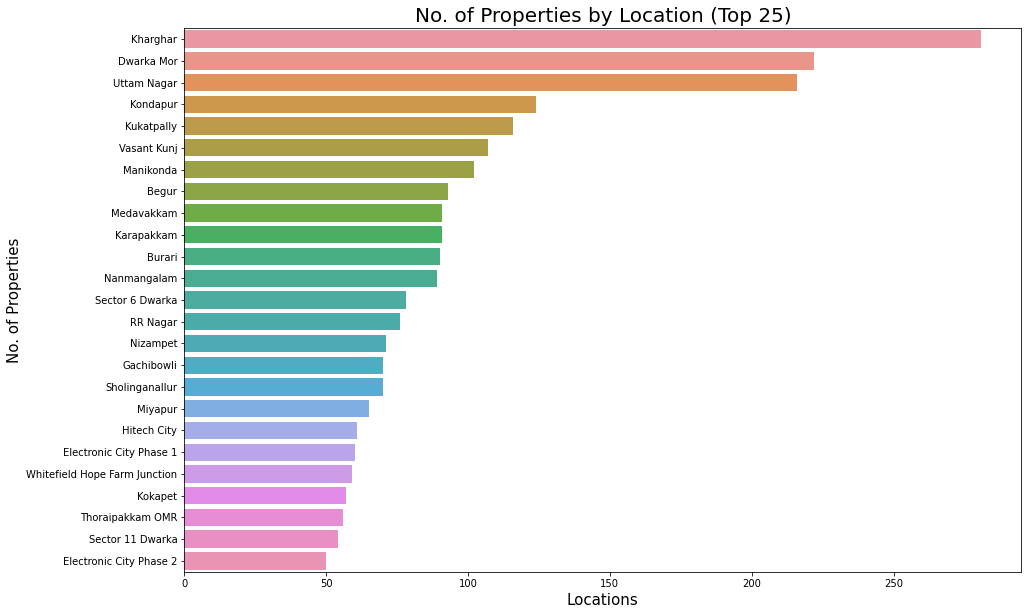

In [ ]:
# No. of Properties by Location (Top 25)
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('No. of Properties by Location (Top 25)', fontsize=20)
sns.countplot(y='Location', data=final_df, order=final_df.Location.value_counts().index[:25])
ax.set_xlabel('Locations', fontsize=15)
ax.set_ylabel('No. of Properties', fontsize=15)
plt.show()

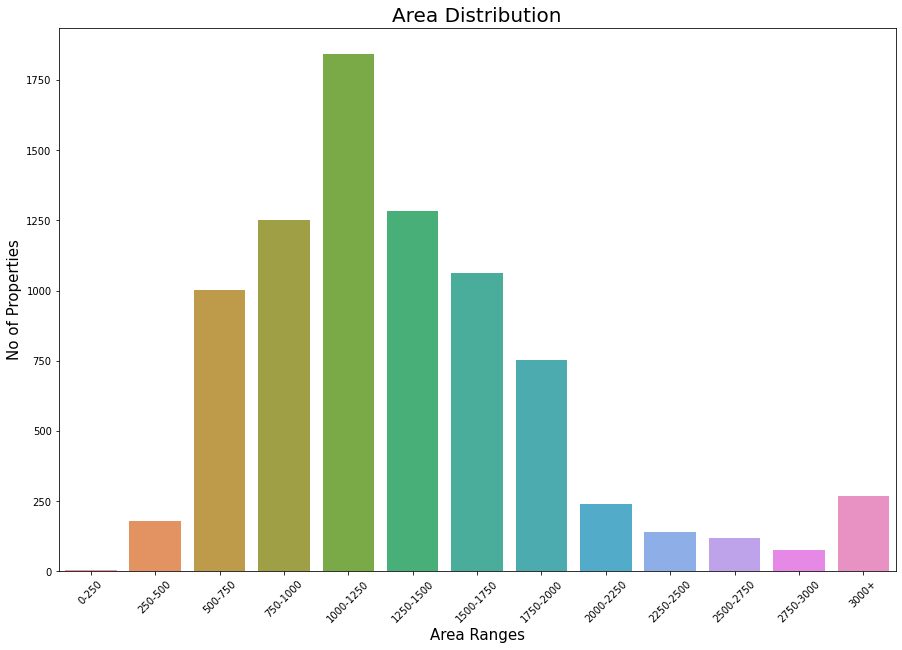

In [ ]:
# Area Distribution count plot
df3 = final_df.copy()
df3['Area'] = pd.cut(df3['Area'], bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, np.inf], labels=['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500-1750', '1750-2000', '2000-2250', '2250-2500', '2500-2750', '2750-3000', '3000+'])
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Area Distribution', fontsize=20)
sns.countplot(x='Area', data=df3)
ax.set_ylabel('No of Properties', fontsize=15)
ax.set_xlabel('Area Ranges', fontsize=15)
plt.xticks(rotation=45)
plt.show()

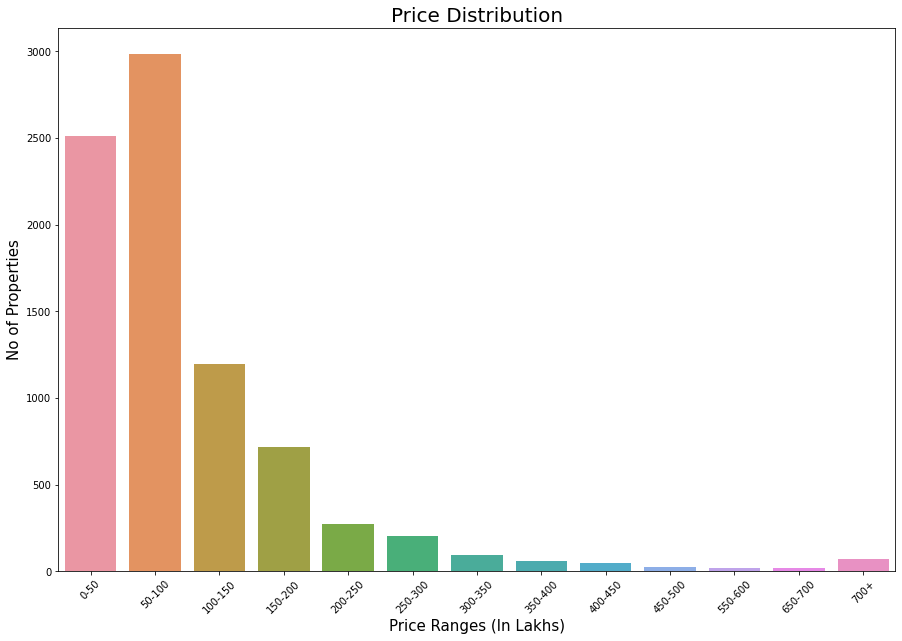

In [ ]:
# Price Distribution count plot
df4 = final_df.copy()
df4['Price'] = pd.cut(df4['Price'],
                     bins=[0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000, 55000000, 60000000, np.inf],
                     labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '550-600', '650-700', '700+'])

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Price Distribution', fontsize=20)
sns.countplot(x='Price', data=df4)
ax.set_ylabel('No of Properties', fontsize=15)
ax.set_xlabel('Price Ranges (In Lakhs)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

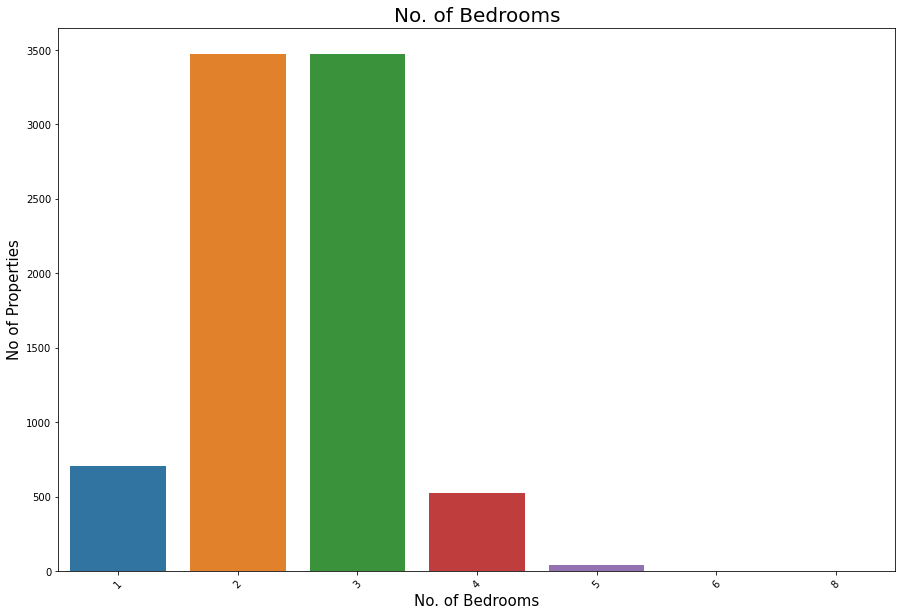

In [ ]:
# No. of Bedrooms count plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('No. of Bedrooms', fontsize=20)
sns.countplot(x='No. of Bedrooms', data=final_df)
ax.set_ylabel('No of Properties', fontsize=15)
ax.set_xlabel('No. of Bedrooms', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Other Binary Features of the Dataset

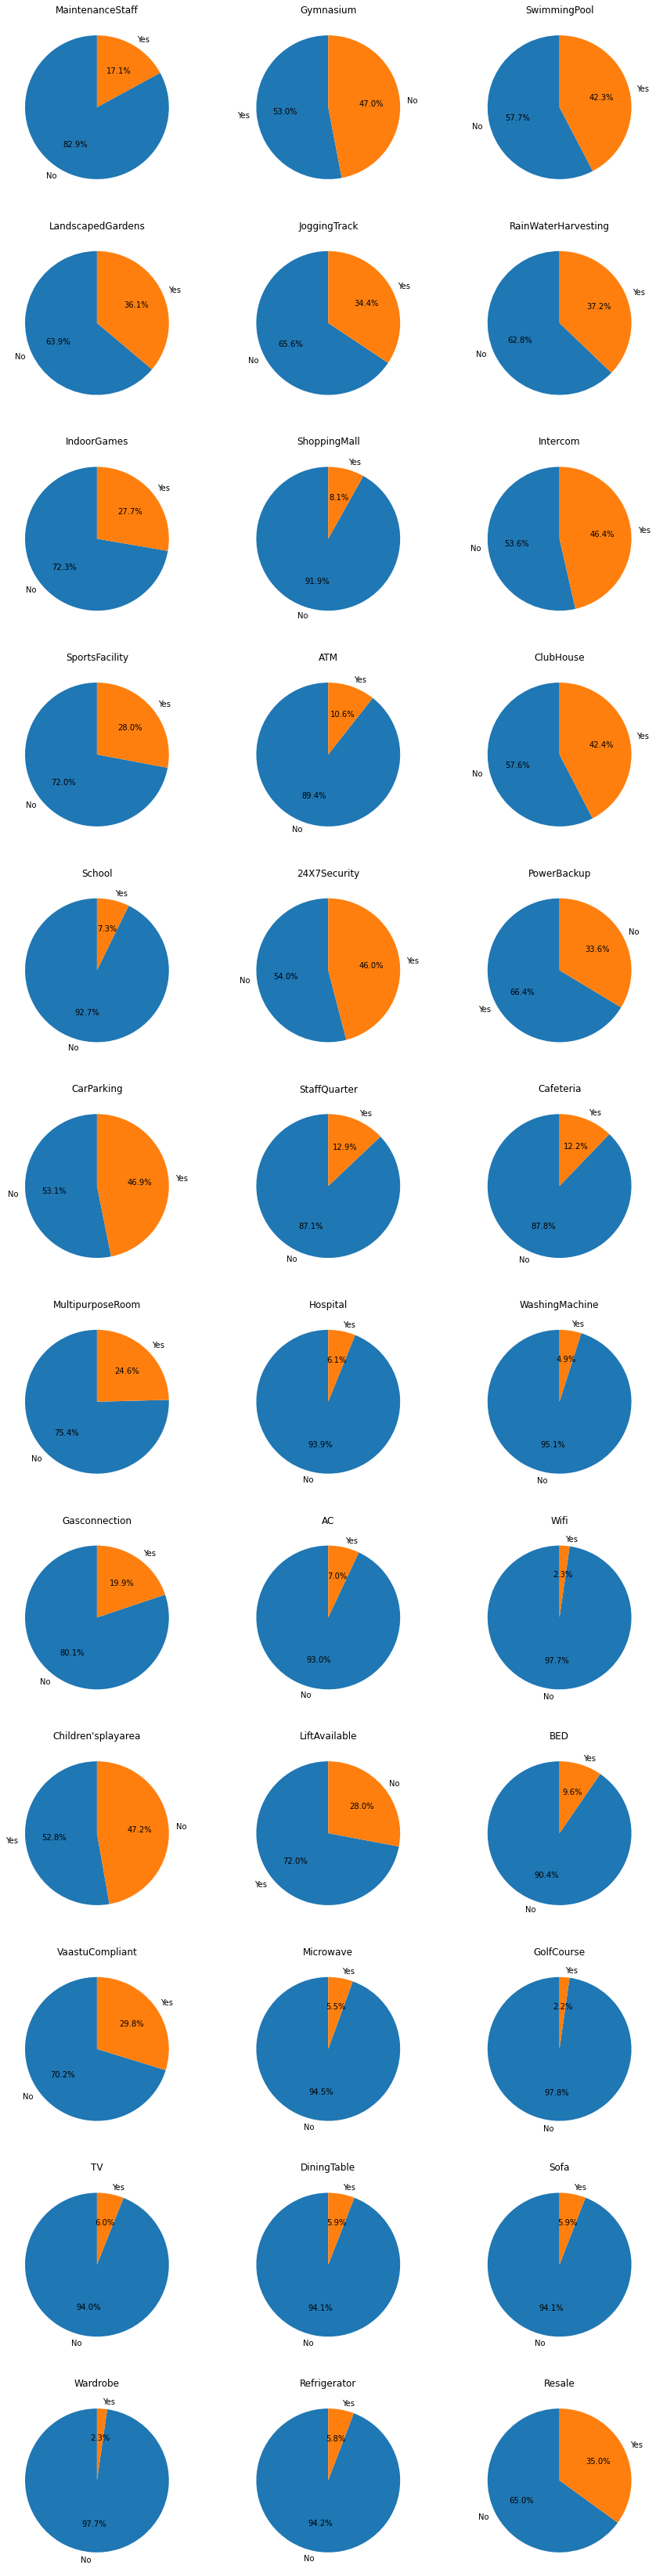

In [ ]:
def fixlabels(li):
    return ['Yes', 'No'] if li[0] == 1 else ['No', 'Yes']
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 60))
for i in range(3,len(final_df.columns)-1):
    axes[(i-4)//3][(i-4)%3].pie(final_df[final_df.columns[i]].value_counts(), labels=fixlabels(final_df[final_df.columns[i]].value_counts().index), autopct='%1.1f%%', startangle=90)
    axes[(i-4)//3][(i-4)%3].set_title(final_df.columns[i])
plt.show()

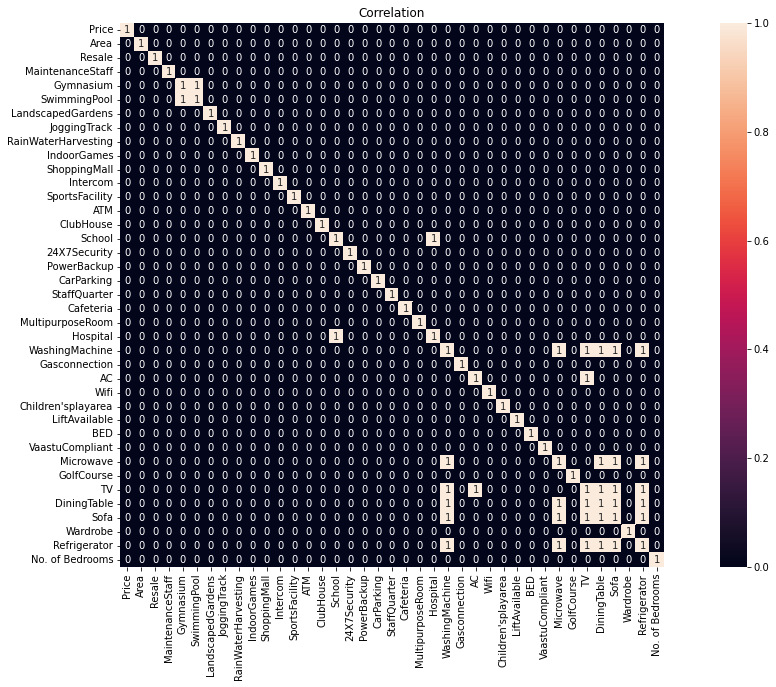

In [ ]:
#Correlation
num=final_df.select_dtypes(exclude='object')
numeric_correlation=num.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation')
sns.heatmap(numeric_correlation>0.75, annot=True, square=True)
plt.show()

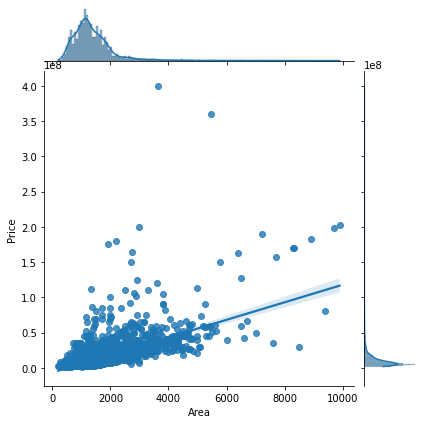

In [ ]:
# Joint plot for Price & Area
sns.jointplot(x='Area',y='Price',data=final_df ,kind='reg')

From this joint plot we can visualise that, Price is directly proportional to Area, if Area increases at the same time Price will also increase. Most values of Area is in range of 0-3000 and most Price value comes in 0-1.

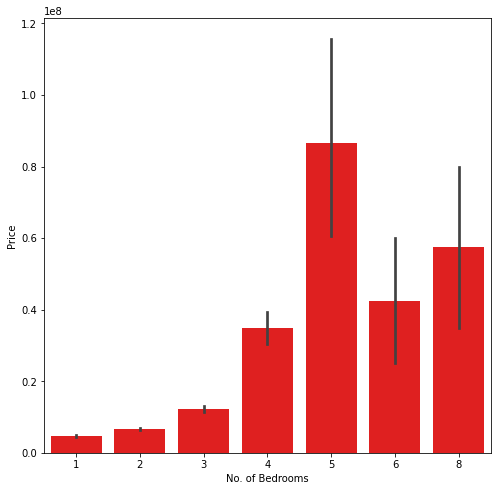

In [ ]:
# Bar plot for Number of Bedrooms & Price
plt.figure(figsize=(8,8))
temp_df= final_df.groupby(['No. of Bedrooms','Price']).size().reset_index()
sns.barplot(x=temp_df['No. of Bedrooms'], y=temp_df['Price'], color='red')
plt.ylabel("Price")
plt.show()

From the diagram we can see that House with 5 Number of Rooms has higher average price than other.

# Label Encoding

In [ ]:
final_df.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,No. of Bedrooms
0,4850000,720,Kharghar,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4500000,600,Kharghar,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6700000,650,Kharghar,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4500000,650,Kharghar,1,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,5000000,665,Kharghar,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Converting the categorical value into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Location'] = le.fit_transform(final_df['Location'])

In [ ]:
final_df.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,No. of Bedrooms
0,4850000,720,325,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4500000,600,325,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6700000,650,325,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4500000,650,325,1,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,5000000,665,325,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
final_df['Location'].tail()

29960    156
29961    482
29962    522
29963    538
29964    146
Name: Location, dtype: int64

In [ ]:
final_df.dtypes

Price                    int64
Area                     int64
Location                 int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCompliant        float64
Microwav

# Feature Scaling

# Method 1 - Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
final_df_std = final_df.copy()
features=pd.DataFrame(standard_scaler.fit_transform(final_df[['Area','Location','No. of Bedrooms']]),columns= final_df[['Area','Location','No. of Bedrooms']].columns)
features.head()

,Area,Location,No. of Bedrooms
0,-0.897849,-0.392359,-1.925407
1,-1.062429,-0.392359,-1.925407
2,-0.993854,-0.392359,-1.925407
3,-0.993854,-0.392359,-1.925407
4,-0.973282,-0.392359,-1.925407


In [ ]:
final_df_std[['Area','Location','No. of Bedrooms']] = features

In [ ]:
final_df_std.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,No. of Bedrooms
0,4850000,-0.897849,-0.392359,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.925407
1,4500000,-1.062429,-0.392359,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.925407
2,6700000,-0.993854,-0.392359,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.925407
3,4500000,-0.993854,-0.392359,1,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.925407
4,5000000,-0.973282,-0.392359,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.925407


In [ ]:
features.describe()

,Area,Location,No. of Bedrooms
count,8.226000e+03,8.226000e+03,8.226000e+03
mean,-1.619581e-16,5.938465e-17,1.096996e-16
std,1.000061e+00,1.000061e+00,1.000061e+00
min,-1.611028e+00,-1.797689e+00,-1.925407e+00
25%,-5.824045e-01,-7.858514e-01,-6.265388e-01
50%,-1.983849e-01,-8.967260e-02,-6.265388e-01
75%,3.653009e-01,8.659517e-01,6.723292e-01
max,1.169251e+01,1.869141e+00,7.166669e+00


In [ ]:
final_df_std.isnull().sum()

Price                     0
Area                   6606
Location               6606
Resale                    0
MaintenanceStaff          0
Gymnasium                 0
SwimmingPool              0
LandscapedGardens         0
JoggingTrack              0
RainWaterHarvesting       0
IndoorGames               0
ShoppingMall              0
Intercom                  0
SportsFacility            0
ATM                       0
ClubHouse                 0
School                    0
24X7Security              0
PowerBackup               0
CarParking                0
StaffQuarter              0
Cafeteria                 0
MultipurposeRoom          0
Hospital                  0
WashingMachine            0
Gasconnection             0
AC                        0
Wifi                      0
Children'splayarea        0
LiftAvailable             0
BED                       0
VaastuCompliant           0
Microwave                 0
GolfCourse                0
TV                        0
DiningTable         

Beacause of Feature scaling using Standarad Scalar we are getting null values, filling it with 0 temporarily and we will check the result

In [ ]:
# Filling na values with 0 temporarily
final_df_std.fillna(0,inplace=True)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df_std.drop('Price',axis=1),final_df_std['Price'],random_state=42,test_size=0.2)


# Model Selection


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",Linear_model.score(X_train,y_train))
print("Score for testing data = ",Linear_model.score(X_test,y_test))

Rmse =  12432141.105134234
Score for training data =  0.11926266483927705
Score for testing data =  0.06440328340204271


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",RFR_model.score(X_train,y_train))

print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  12269709.343367347
Score for training data =  0.7722218914004587
Score for testing data=  0.08869159189623577


## Randomized Search Cv for Random Forest

In [ ]:
'''import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['None', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error', 'poisson']}
print(random_grid)'''

"import numpy as np\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]\n# Number of features to consider at every split\nmax_features = ['None', 'sqrt','log2']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(1, 100,10)]\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10,14]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4,6,8]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n              'criterion':['squared_error', 'absolute_error', 'poisson']}\nprint(random_grid)"

In [ ]:
'''RFR_model=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)'''

'RFR_model=RandomForestRegressor()\nrf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)\n### fit the randomized model\nrf_randomcv.fit(X_train,y_train)'

In [ ]:
#rf_randomcv.best_params_

In [ ]:
#rf_randomcv.best_score_

In [ ]:
#rf_randomcv

In [ ]:
#best_random_grid=rf_randomcv.best_estimator_

In [ ]:
#best_random_grid

In [ ]:
'''print("Score for training data = ",rf_randomcv.score(X_train,y_train))
print("Score for testing data = ",rf_randomcv.score(X_test,y_test))'''

'print("Score for training data = ",rf_randomcv.score(X_train,y_train))\nprint("Score for testing data = ",rf_randomcv.score(X_test,y_test))'

## GridSearch CV for Random Forest

In [ ]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 10, rf_randomcv.best_params_['n_estimators'] + 20]
}

print(param_grid)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'criterion': [rf_randomcv.best_params_['criterion']],\n    'max_depth': [rf_randomcv.best_params_['max_depth']],\n    'max_features': [rf_randomcv.best_params_['max_features']],\n    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], \n                         rf_randomcv.best_params_['min_samples_leaf']+2, \n                         rf_randomcv.best_params_['min_samples_leaf'] + 4],\n    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,\n                          rf_randomcv.best_params_['min_samples_split'] - 1,\n                          rf_randomcv.best_params_['min_samples_split'], \n                          rf_randomcv.best_params_['min_samples_split'] +1,\n                          rf_randomcv.best_params_['min_samples_split'] + 2],\n    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10, \n                   

In [ ]:
#### Fit the grid_search to the data
'''RFR_model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)'''

'RFR_model=RandomForestRegressor()\ngrid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)\ngrid_search.fit(X_train,y_train)'

In [ ]:
#grid_search.best_estimator_

In [ ]:
'''best_grid=grid_search.best_estimator_
best_grid'''

'best_grid=grid_search.best_estimator_\nbest_grid'

In [ ]:
'''print("Score for training data = ",best_grid.score(X_train,y_train))
print("Score for testing data = ",best_grid.score(X_test,y_test))'''

'print("Score for training data = ",best_grid.score(X_train,y_train))\nprint("Score for testing data = ",best_grid.score(X_test,y_test))'

##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,y_train)
predict = DTR_model.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",DTR_model.score(X_train,y_train))

print("Score for testing data = ",DTR_model.score(X_test,y_test))

Rmse =  15123878.35938233
Score for training data =  0.8522203098044902
Score for testing data =  -0.38459633889881073


## Hyperparameter Tuning for RandomizedSearchCV



In [ ]:
'''import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# strategy used to choose the split at each node
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Create the random grid
random_grid = {'criterion':['squared_error', 'absolute_error', 'poisson','friedman_mse'],
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
              }
print(random_grid)'''

"import numpy as np\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# strategy used to choose the split at each node\nsplitter = ['best', 'random']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(1, 100,10)]\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10,14]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4,6,8]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt','log2']\n# Create the random grid\nrandom_grid = {'criterion':['squared_error', 'absolute_error', 'poisson','friedman_mse'],\n               'splitter': splitter,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'max_features': max_features\n              }\nprint(random_grid)"

In [ ]:
'''DTR_model = DecisionTreeRegressor()
dtr_randomcv=RandomizedSearchCV(estimator=DTR_model,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
dtr_randomcv.fit(X_train,y_train)'''

'DTR_model = DecisionTreeRegressor()\ndtr_randomcv=RandomizedSearchCV(estimator=DTR_model,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,\n                               random_state=100,n_jobs=-1)\n### fit the randomized model\ndtr_randomcv.fit(X_train,y_train)'

In [ ]:
#dtr_randomcv.best_params_

In [ ]:
#dtr_randomcv

In [ ]:
'''best_random_grid=dtr_randomcv.best_estimator_
best_random_grid'''

'best_random_grid=dtr_randomcv.best_estimator_\nbest_random_grid'

In [ ]:
#print("Score = ",dtr_randomcv.score(X_train,y_train))

In [ ]:
#print("Score for testing data= ",dtr_randomcv.score(X_test,y_test))

##GridSearch CV for Decision Tree Regressor

In [ ]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2]
              }

print(param_grid)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'criterion': [rf_randomcv.best_params_['criterion']],\n    'max_depth': [rf_randomcv.best_params_['max_depth']],\n    'max_features': [rf_randomcv.best_params_['max_features']],\n    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], \n                         rf_randomcv.best_params_['min_samples_leaf']+2, \n                         rf_randomcv.best_params_['min_samples_leaf'] + 4],\n    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,\n                          rf_randomcv.best_params_['min_samples_split'] - 1,\n                          rf_randomcv.best_params_['min_samples_split'], \n                          rf_randomcv.best_params_['min_samples_split'] +1,\n                          rf_randomcv.best_params_['min_samples_split'] + 2]\n              }\n\nprint(param_grid)"

In [ ]:
#dtr_randomcv.best_params_

In [ ]:
'''DTR_model=DecisionTreeRegressor()
grid_search=GridSearchCV(estimator=DTR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
'''

'DTR_model=DecisionTreeRegressor()\ngrid_search=GridSearchCV(estimator=DTR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)\ngrid_search.fit(X_train,y_train)\n'

In [ ]:
#grid_search.best_estimator_


In [ ]:
'''best_grid=grid_search.best_estimator_
best_grid'''

'best_grid=grid_search.best_estimator_\nbest_grid'

In [ ]:
#print("Score = ",grid_search.score(X_train,y_train))

In [ ]:
#print("Score for testing data= ",grid_search.score(X_test,y_test))

## XG Boost

In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  11926087.80675359
Score for training data =  0.8107614347127179
Score for testing data=  0.13902045707594668


### Results

In [ ]:
list = []

list.append(RFR_model.score(X_train,y_train))
list.append(DTR_model.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
#list.append(KNN.score(X_train,y_train))
list.append(Linear_model.score(X_train,y_train))


In [ ]:
list1 = []

list1.append(RFR_model.score(X_test,y_test))
list1.append(DTR_model.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
#list1.append(KNN.score(X_test,y_test))
list1.append(Linear_model.score(X_test,y_test))


In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR","Linear Reg"],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR","Linear Reg"],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)
result

,Train,Test
RF,0.772222,0.088692
DTR,0.852220,-0.384596
XGBR,0.810761,0.139020
Linear Reg,0.119263,0.064403


We have tried the models like Linear Regression, Decision tree, Random Forest Regressor and XG Boost but we come to fina conclusion that we are not getting satisfactory result, so we will try another method.

# Method 2 by Min Max Scaler

# Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
final_df_minmax = final_df.copy()
feature= pd.DataFrame(min_max_scaler.fit_transform(final_df[['Area','Location','No. of Bedrooms']]),columns= final_df[['Area','Location','No. of Bedrooms']].columns)

In [ ]:
feature.head()

,Area,Location,No. of Bedrooms
0,0.053608,0.383255,0.0
1,0.041237,0.383255,0.0
2,0.046392,0.383255,0.0
3,0.046392,0.383255,0.0
4,0.047938,0.383255,0.0


In [ ]:
final_df_minmax[['Area','Location','No. of Bedrooms']] = feature

In [ ]:
final_df_minmax.head()

,Price,Area,Location,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,No. of Bedrooms
0,4850000,0.053608,0.383255,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4500000,0.041237,0.383255,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6700000,0.046392,0.383255,1,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4500000,0.046392,0.383255,1,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5000000,0.047938,0.383255,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature.describe

<bound method NDFrame.describe of           Area  Location  No. of Bedrooms
0     0.053608  0.383255         0.000000
1     0.041237  0.383255         0.000000
2     0.046392  0.383255         0.000000
3     0.046392  0.383255         0.000000
4     0.047938  0.383255         0.000000
...        ...       ...              ...
8221  0.025773  0.183962         0.000000
8222  0.072165  0.568396         0.285714
8223  0.103093  0.615566         0.142857
8224  0.118557  0.634434         0.285714
8225  0.181753  0.172170         0.428571

[8226 rows x 3 columns]>

In [ ]:
final_df_minmax.isnull().sum()

Price                     0
Area                   6606
Location               6606
Resale                    0
MaintenanceStaff          0
Gymnasium                 0
SwimmingPool              0
LandscapedGardens         0
JoggingTrack              0
RainWaterHarvesting       0
IndoorGames               0
ShoppingMall              0
Intercom                  0
SportsFacility            0
ATM                       0
ClubHouse                 0
School                    0
24X7Security              0
PowerBackup               0
CarParking                0
StaffQuarter              0
Cafeteria                 0
MultipurposeRoom          0
Hospital                  0
WashingMachine            0
Gasconnection             0
AC                        0
Wifi                      0
Children'splayarea        0
LiftAvailable             0
BED                       0
VaastuCompliant           0
Microwave                 0
GolfCourse                0
TV                        0
DiningTable         

Beacause of Feature scaling using Min-Max Scaler we are getting null values, filling it with 0 temporarily and we will check the result

In [ ]:
# Filling na values with 0 temporarily
final_df_minmax.fillna(0,inplace=True)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df_minmax.drop('Price',axis=1),final_df_minmax['Price'],random_state=42,test_size=0.2)


# Model Selection

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",Linear_model.score(X_train,y_train))
print("Score for testing data= ",Linear_model.score(X_test,y_test))

Rmse =  12405254.5366815
Score for training data=  0.12078181500683038
Score for testing data=  0.0684456738539082


In [ ]:
#Linear_model.coef_

In [ ]:
#Linear_model.intercept_

##Manual Hyper Parameter Tuning

In [ ]:
'''from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=None, positive=False)
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",Linear_model.score(X_train,y_train))'''

'from sklearn.linear_model import LinearRegression\nLinear_model = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=None, positive=False)\nLinear_model.fit(X_train,y_train)\npredict = Linear_model.predict(X_test)\n\n# calulating root mean squared error\nfrom sklearn.metrics import mean_squared_error\nrmse=np.sqrt(mean_squared_error(y_test,predict))\nprint("Rmse = ",rmse)\n\nprint("Score = ",Linear_model.score(X_train,y_train))'

In [ ]:
#print("Score for testing data= ",Linear_model.score(X_test,y_test))

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",RFR_model.score(X_train,y_train))
print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  11902637.090362502
Score for training data=  0.7838889987915099
Score for testing data=  0.14240308122729073


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,y_train)
predict = DTR_model.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",DTR_model.score(X_train,y_train))
print("Score for testing data= ",DTR_model.score(X_test,y_test))

Rmse =  14243880.550945777
Score for training data=  0.8522203098044902
Score for testing data=  -0.2281558284426548


##XG Boost Technique


In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)
print(XGBR)

XGBRegressor(max_depth=10)


In [ ]:
XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  12255164.629614087
Score for training data=  0.8245783775285821
Score for testing data=  0.09085087104220424


## Hyperparameter Tuning using Grid Search

In [ ]:
''' param_grid = {"max_depth":    [5,10,15],
              "n_estimators": [50,150,200],
              "learning_rate": [0.01, 0.015]}  '''

' param_grid = {"max_depth":    [5,10,15],\n              "n_estimators": [50,150,200],\n              "learning_rate": [0.01, 0.015]}  '

In [ ]:
# search = GridSearchCV(XGBR, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
# print("The best hyperparameters are ",search.best_params_)

In [ ]:
'''XGBR = XGBRegressor(learning_rate = 0.015, max_depth = 15, n_estimators = 200)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",XGBR.score(X_train,y_train))

print("Score for testing data= ",XGBR.score(X_test,y_test))'''

'XGBR = XGBRegressor(learning_rate = 0.015, max_depth = 15, n_estimators = 200)\n \nXGBR.fit(X_train,y_train)\npredict = XGBR.predict(X_test)\n\nfrom sklearn.metrics import mean_squared_error\nrmse=np.sqrt(mean_squared_error(y_test,predict))\nprint("Rmse = ",rmse)\n\nprint("Score = ",XGBR.score(X_train,y_train))\n\nprint("Score for testing data= ",XGBR.score(X_test,y_test))'

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",KNN.score(X_train,y_train))
print("Score for testing data= ",KNN.score(X_test,y_test))

Rmse =  12526967.681616595
Score for training data=  0.4494287646911901
Score for testing data=  0.050076259908785725


### Results

In [ ]:
list = []

list.append(RFR_model.score(X_train,y_train))
list.append(DTR_model.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
list.append(KNN.score(X_train,y_train))
list.append(Linear_model.score(X_train,y_train))


In [ ]:
list1 = []

list1.append(RFR_model.score(X_test,y_test))
list1.append(DTR_model.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
list1.append(KNN.score(X_test,y_test))
list1.append(Linear_model.score(X_test,y_test))


In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR",'KNN',"Linear Reg"],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR",'KNN',"Linear Reg"],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)
result

,Train,Test
RF,0.783889,0.142403
DTR,0.852220,-0.228156
XGBR,0.824578,0.090851
KNN,0.449429,0.050076
Linear Reg,0.120782,0.068446


# Method 3 - Without Feature Scaling

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df.drop('Price',axis=1),final_df['Price'],random_state=42,test_size=0.2)

# Model Selection

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",Linear_model.score(X_train,y_train))

print("Score for testing data = ",Linear_model.score(X_test,y_test))

Rmse =  9917019.022072533
Score for training data =  0.5169826815331625
Score for testing data =  0.40466814680969876


## Manual Hyper Parameter Tuning

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=None, positive=False)
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",Linear_model.score(X_train,y_train))

print("Score for testing data= ",Linear_model.score(X_test,y_test))

Rmse =  10018855.531974893
Score =  0.5065807456586946
Score for testing data=  0.39237860683157366


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",RFR_model.score(X_train,y_train))

print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  9984235.00340367
Score for training data=  0.9414502979861724
Score for testing data=  0.3965706681093285


### Hyperparameter Tuning

In [ ]:
'''import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['None', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error', 'poisson']}
print(random_grid)'''

"import numpy as np\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]\n# Number of features to consider at every split\nmax_features = ['None', 'sqrt','log2']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(1, 100,10)]\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10,14]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4,6,8]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n              'criterion':['squared_error', 'absolute_error', 'poisson']}\nprint(random_grid)"

In [ ]:
'''RFR_model=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)'''

'RFR_model=RandomForestRegressor()\nrf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)\n### fit the randomized model\nrf_randomcv.fit(X_train,y_train)'

In [ ]:
'''rf_randomcv.best_params_

rf_randomcv.best_score_

best_random_grid=rf_randomcv.best_estimator_

print("Score = ",rf_randomcv.score(X_train,y_train))

print("Score = ",rf_randomcv.score(X_test,y_test))'''

'rf_randomcv.best_params_\n\nrf_randomcv.best_score_\n\nbest_random_grid=rf_randomcv.best_estimator_\n\nprint("Score = ",rf_randomcv.score(X_train,y_train))\n\nprint("Score = ",rf_randomcv.score(X_test,y_test))'

In [ ]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 10, rf_randomcv.best_params_['n_estimators'] + 20]
}

print(param_grid)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'criterion': [rf_randomcv.best_params_['criterion']],\n    'max_depth': [rf_randomcv.best_params_['max_depth']],\n    'max_features': [rf_randomcv.best_params_['max_features']],\n    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], \n                         rf_randomcv.best_params_['min_samples_leaf']+2, \n                         rf_randomcv.best_params_['min_samples_leaf'] + 4],\n    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,\n                          rf_randomcv.best_params_['min_samples_split'] - 1,\n                          rf_randomcv.best_params_['min_samples_split'], \n                          rf_randomcv.best_params_['min_samples_split'] +1,\n                          rf_randomcv.best_params_['min_samples_split'] + 2],\n    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10, \n                   

In [ ]:
'''#### Fit the grid_search to the data
RFR_model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)'''

'#### Fit the grid_search to the data\nRFR_model=RandomForestRegressor()\ngrid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)\ngrid_search.fit(X_train,y_train)'

In [ ]:
'''best_grid=grid_search.best_estimator_
best_grid

print("Score = ",best_grid.score(X_train,y_train))

print("Score for testing data= ",best_grid.score(X_test,y_test))'''

'best_grid=grid_search.best_estimator_\nbest_grid\n\nprint("Score = ",best_grid.score(X_train,y_train))\n\nprint("Score for testing data= ",best_grid.score(X_test,y_test))'

##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,y_train)
predict = DTR_model.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",DTR_model.score(X_train,y_train))

print("Score for testing data= ",DTR_model.score(X_test,y_test))

Rmse =  13331282.484206917
Score for training data=  0.9996729095242173
Score for testing data=  -0.07582266506997049


## XG Boost

In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  10552329.340834478
Score for training data =  0.9900729770810718
Score for testing data=  0.32594784436467616


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",KNN.score(X_train,y_train))

print("Score for testing data= ",KNN.score(X_test,y_test))

Rmse =  10770181.693149934
Score for training data =  0.6431392595604211
Score for testing data=  0.2978290025191822


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)
predict = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",GBR.score(X_train,y_train))
print("Score for testing data = ",GBR.score(X_test,y_test))

Rmse =  9568950.69956694
Score for training data =  0.8085980361640769
Score for testing data =  0.44572478175144126


In [ ]:
from lightgbm import LGBMRegressor

LXGB = LGBMRegressor()

LXGB.fit(X_train,y_train)
predict = LXGB.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",LXGB.score(X_train,y_train))
print("Score for testing data= ",LXGB.score(X_test,y_test))

Rmse =  9222641.13309089
Score for training data =  0.8247972729770828
Score for testing data=  0.4851183106467688


### Results

In [ ]:
list = []

list.append(RFR_model.score(X_train,y_train))
list.append(DTR_model.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
list.append(GBR.score(X_train,y_train))
list.append(LXGB.score(X_train,y_train))
#list.append(Linear_model.score(X_train,y_train))
list.append(KNN.score(X_train,y_train))

In [ ]:
list1 = []

list1.append(RFR_model.score(X_test,y_test))
list1.append(DTR_model.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
list1.append(GBR.score(X_test,y_test))
list1.append(LXGB.score(X_test,y_test))
#list1.append(Linear_model.score(X_test,y_test))
list1.append(KNN.score(X_test,y_test))

In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)

In [ ]:
result

,Train,Test
RF,0.941450,0.396571
DTR,0.999673,-0.075823
XGBR,0.990073,0.325948
GBR,0.808598,0.445725
LXGB,0.824797,0.485118
KNN,0.643139,0.297829


# Oulier Treatment

Reducing Skewness using IQR Technique

In [ ]:
for feature in ['No. of Bedrooms','Area','Price']:
    print('Initial Skew value: ', final_df[feature].skew())
    Q1 = final_df[feature].quantile(0.25)
    Q3 = final_df[feature].quantile(0.75)
    #print(Q1,Q3)
    final_df[feature] = np.where(final_df[feature] <Q1, Q1,final_df[feature])
    final_df[feature] = np.where(final_df[feature] >Q3, Q3,final_df[feature])
    print('Final Skew value: ', final_df[feature].skew())
    print()

Initial Skew value:  0.21171718637713274
Final Skew value:  0.03210334956218199

Initial Skew value:  2.99696285369283
Final Skew value:  0.15507153460929013

Initial Skew value:  9.79296430399273
Final Skew value:  0.3077338401156396



In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df.drop('Price',axis=1),final_df['Price'],test_size=0.2,random_state=42)

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
predict = Linear_model.predict(X_test)

# calulating root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",Linear_model.score(X_train,y_train))
print("Score for testing data= ",Linear_model.score(X_test,y_test))

Rmse =  1920268.2512013707
Score =  0.665938533744456
Score for testing data=  0.6458458979399884


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,y_train)
predict = DTR_model.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",DTR_model.score(X_train,y_train))
print("Score for testing data = ",DTR_model.score(X_test,y_test))

Rmse =  1744864.510741401
Score for training data =  0.9928812635172424
Score for testing data =  0.7075902211253657


## XG Boost

In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  1314982.5637677019
Score =  0.9705319698026492
Score for testing data=  0.8339233936124196


## Hyperparameter Tuning using Grid Search for XG Boost

In [ ]:
'''param_grid = {"max_depth":    [5,10,15],
              "n_estimators": [50,150,200],
              "learning_rate": [0.01, 0.015]} '''

'param_grid = {"max_depth":    [5,10,15],\n              "n_estimators": [50,150,200],\n              "learning_rate": [0.01, 0.015]} '

In [ ]:
#search = GridSearchCV(XGBR, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
#print("The best hyperparameters are ",search.best_params_)

In [ ]:
'''XGBR = XGBRegressor(learning_rate = 0.015, max_depth = 15, n_estimators = 200)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))'''

'XGBR = XGBRegressor(learning_rate = 0.015, max_depth = 15, n_estimators = 200)\n \nXGBR.fit(X_train,y_train)\npredict = XGBR.predict(X_test)\n\nfrom sklearn.metrics import mean_squared_error\nrmse=np.sqrt(mean_squared_error(y_test,predict))\nprint("Rmse = ",rmse)\n\nprint("Score = ",XGBR.score(X_train,y_train))\n\nprint("Score for testing data= ",XGBR.score(X_test,y_test))'

In [ ]:
from lightgbm import LGBMRegressor

LXGB = LGBMRegressor()

LXGB.fit(X_train,y_train)
predict = LXGB.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",LXGB.score(X_train,y_train))
print("Score for testing data= ",LXGB.score(X_test,y_test))

Rmse =  1413334.0507406997
Score =  0.8680835401279031
Score for testing data=  0.8081516280847196


In [ ]:

from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,y_train)
predict = DTR_model.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",DTR_model.score(X_train,y_train))

print("Score for testing data= ",DTR_model.score(X_test,y_test))

Rmse =  1715698.2339954663
Score =  0.9928812635172424
Score for testing data=  0.7172840688569999


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",RFR_model.score(X_train,y_train))

print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  1387108.6533061266
Score for training data=  0.9665692643868655
Score for testing data=  0.8152053322850267


## GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)
predict = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",GBR.score(X_train,y_train))
print("Score for testing data = ",GBR.score(X_test,y_test))

Rmse =  1650526.301404705
Score =  0.7646857592281381
Score for testing data=  0.7383544384747929


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",KNN.score(X_train,y_train))
print("Score for testing data= ",KNN.score(X_test,y_test))

Rmse =  1843143.4875477825
Score for testing data=  0.7849986794989707
Score for testing data=  0.6737227708232143


### Results

In [ ]:
list = []

list.append(RFR_model.score(X_train,y_train))
list.append(DTR_model.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
list.append(GBR.score(X_train,y_train))
list.append(LXGB.score(X_train,y_train))
#list.append(Linear_model.score(X_train,y_train))
list.append(KNN.score(X_train,y_train))

In [ ]:
list1 = []

list1.append(RFR_model.score(X_test,y_test))
list1.append(DTR_model.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
list1.append(GBR.score(X_test,y_test))
list1.append(LXGB.score(X_test,y_test))
#list1.append(Linear_model.score(X_test,y_test))
list1.append(KNN.score(X_test,y_test))

In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)

In [ ]:
result

,Train,Test
RF,0.966569,0.815205
DTR,0.992881,0.717284
XGBR,0.970532,0.833923
GBR,0.764686,0.738354
LXGB,0.868084,0.808152
KNN,0.784999,0.673723


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",RFR_model.score(X_train,y_train))

print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  1385161.8047074769
Score for training data =  0.9669367743663815
Score for testing data=  0.8157236979760865


## Randomized Search Cv

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['None', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error', 'poisson']}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['None', 'sqrt', 'log2'], 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [ ]:
RFR_model=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

'RFR_model=RandomForestRegressor()\nrf_randomcv=RandomizedSearchCV(estimator=RFR_model,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,n_jobs=-1)\n### fit the randomized model\nrf_randomcv.fit(X_train,y_train)'

In [ ]:
#rf_randomcv.best_params_

In [ ]:
#rf_randomcv.best_score_

In [ ]:
#rf_randomcv

In [ ]:
#best_random_grid=rf_randomcv.best_estimator_

In [ ]:
#best_random_grid

In [ ]:
'''print("Score for training data = ",rf_randomcv.score(X_train,y_train))
print("Score for testing data = ",rf_randomcv.score(X_test,y_test))'''

'print("Score for training data = ",rf_randomcv.score(X_train,y_train))\nprint("Score for testing data = ",rf_randomcv.score(X_test,y_test))'

## GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 10, rf_randomcv.best_params_['n_estimators'] + 20]
}

print(param_grid)

NameError: ignored

In [ ]:
#### Fit the grid_search to the data
RFR_model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_
best_grid

In [ ]:
print("Score for training data = ",best_grid.score(X_train,y_train))
print("Score for testing data = ",best_grid.score(X_test,y_test))

# Feature Selection

## Method 1 : Feature Importance

In [ ]:
RFR_model.feature_importances_

array([0.07262091, 0.26620739, 0.6611717 ])

In [ ]:
feature_importance = pd.DataFrame({'importance': RFR_model.feature_importances_}, index= X_train.columns).sort_values('importance')

In [ ]:
feature_importance

,importance
Resale,0.072621
Location,0.266207
Area,0.661172


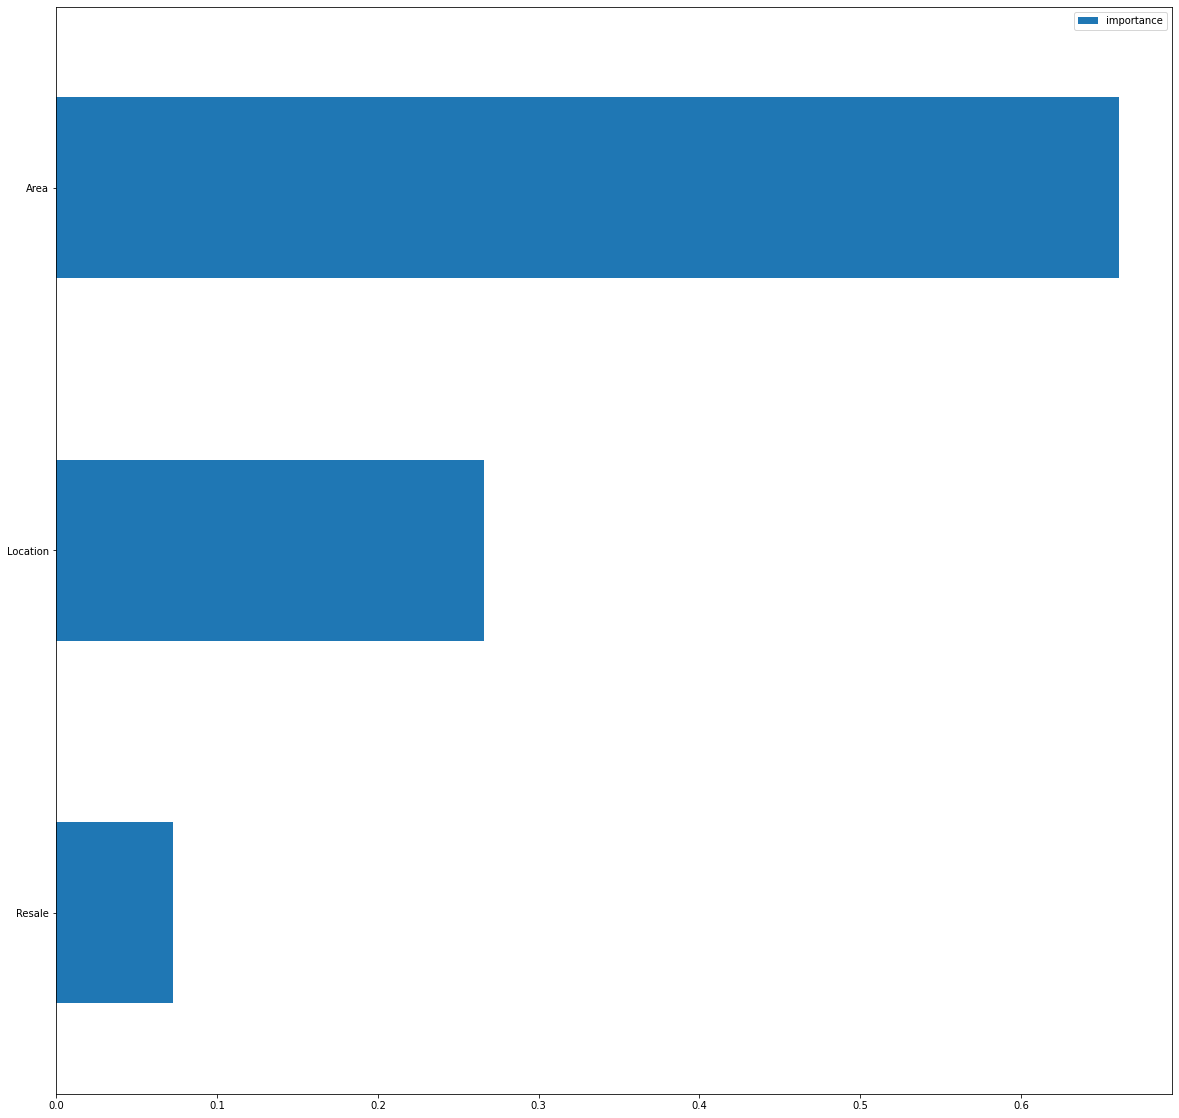

In [ ]:
feature_importance.plot(kind='barh',figsize=(20,20))

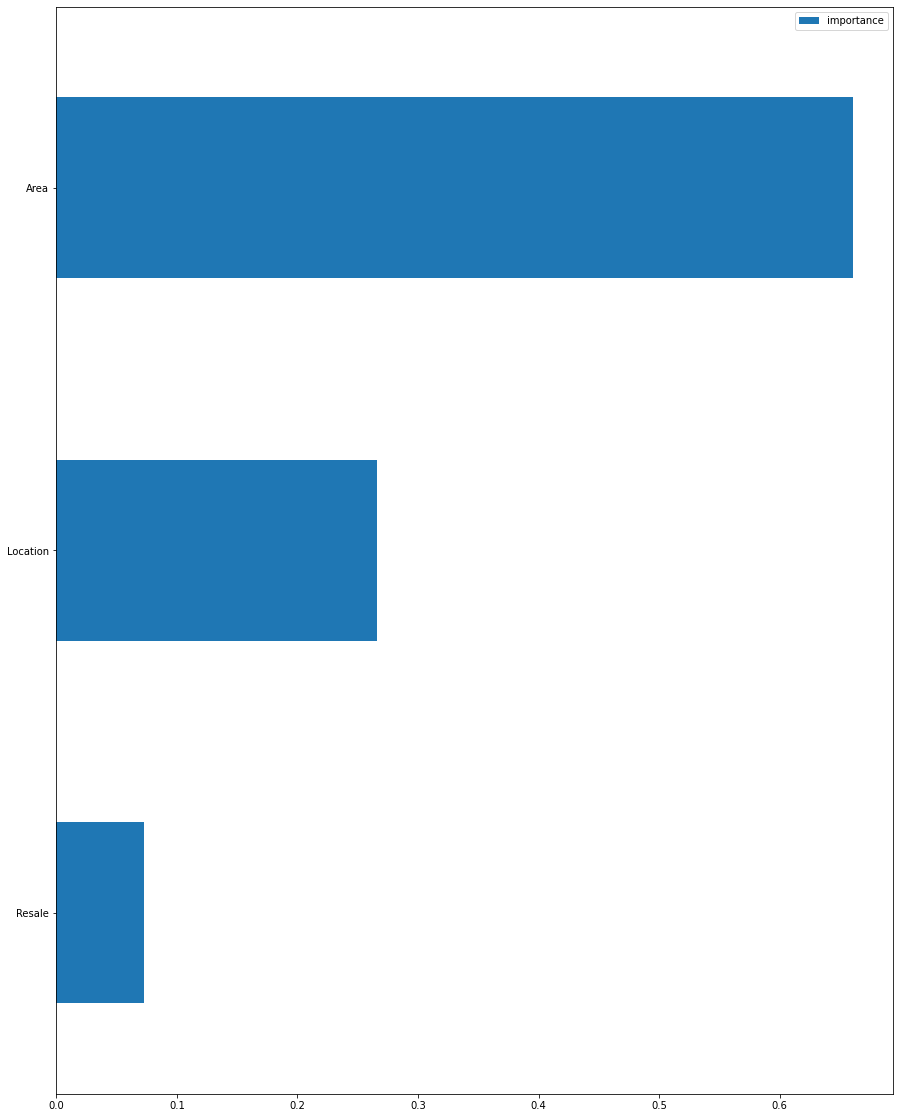

In [ ]:
# Top features selection
feature_importance=feature_importance[feature_importance.importance>0.020]
feature_importance.plot(kind='barh',figsize=(15,20))

In [ ]:
df_featimp =final_df[feature_importance.index]
df_featimp.shape

(8226, 3)

In [ ]:
x=df_featimp
x

,Resale,Location,Area
0,1,325,950.0
1,1,325,950.0
2,1,325,950.0
3,1,325,950.0
4,1,325,950.0
...,...,...,...
29960,1,156,950.0
29961,1,482,950.0
29962,1,522,1200.0
29963,1,538,1350.0


## Train Test Split using selected Features

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,final_df['Price'],random_state=42,test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)
predict = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",GBR.score(X_train,y_train))
print("Score for testing data= ",GBR.score(X_test,y_test))

Rmse =  1729945.469480023
Score =  0.7378638771296674
Score for testing data=  0.7125692018919628


In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  1444500.1087617571
Score =  0.9276340755874699
Score for testing data=  0.7995972710757409


## Hyperparameter Tuning using Grid Search for XG Boost

In [ ]:
param_grid = {"max_depth":    [5,10,15],
              "n_estimators": [50,150,200],
              "learning_rate": [0.01, 0.015]}

In [ ]:
search = GridSearchCV(XGBR, param_grid, cv=5).fit(X_train, y_train)

[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 15, 'n_estimators': 200}


In [ ]:
XGBR = XGBRegressor(learning_rate = 0.015, max_depth = 15, n_estimators = 200)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

[18:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse =  1639513.5046965072
Score =  0.8829330337265591
Score for testing data=  0.7418343423546166


In [ ]:
from lightgbm import LGBMRegressor

LXGB = LGBMRegressor()

LXGB.fit(X_train,y_train)
predict = LXGB.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",LXGB.score(X_train,y_train))
print("Score for testing data= ",LXGB.score(X_test,y_test))

Rmse =  1564207.9461745324
Score =  0.8168823158152574
Score for testing data=  0.7650056346875151


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,y_train)
predict = RFR_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data= ",RFR_model.score(X_train,y_train))

print("Score for testing data= ",RFR_model.score(X_test,y_test))

Rmse =  1588249.3001405466
Score for training data=  0.9406631439557479
Score for testing data=  0.7577265528613185


## Hyperparameter Tuning for RandomizedSearchCV



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# strategy used to choose the split at each node
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Create the random grid
random_grid = {'criterion':['squared_error', 'absolute_error', 'poisson','friedman_mse'],
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
              }
print(random_grid)

{'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'], 'splitter': ['best', 'random'], 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2']}


In [ ]:
DTR_model = DecisionTreeRegressor()
dtr_randomcv=RandomizedSearchCV(estimator=DTR_model,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
dtr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
dtr_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 67,
 'criterion': 'friedman_mse'}

In [ ]:
dtr_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=dtr_randomcv.best_estimator_
best_random_grid

DecisionTreeRegressor(criterion='friedman_mse', max_depth=67,
                      max_features='sqrt', min_samples_leaf=4)

In [ ]:
print("Score for training data= ",dtr_randomcv.score(X_train,y_train))
print("Score for testing data= ",dtr_randomcv.score(X_test,y_test))

Score for training data=  0.8332047091221673
Score for testing data=  0.7132357990826464


## GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20, rf_randomcv.best_params_['n_estimators'] - 10,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 10, rf_randomcv.best_params_['n_estimators'] + 20]
}

print(param_grid)

NameError: ignored

In [ ]:
#### Fit the grid_search to the data
RFR_model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_
best_grid

In [ ]:
print("Score for training data = ",best_grid.score(X_train,y_train))
print("Score for testing data = ",best_grid.score(X_test,y_test))

## KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",KNN.score(X_train,y_train))

print("Score for testing data= ",KNN.score(X_test,y_test))

### Results

In [ ]:
list = []

list.append(RFR_model.score(X_train,y_train))
list.append(DTR_model.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
list.append(GBR.score(X_train,y_train))
list.append(LXGB.score(X_train,y_train))
#list.append(Linear_model.score(X_train,y_train))
list.append(KNN.score(X_train,y_train))

In [ ]:
list1 = []

list1.append(RFR_model.score(X_test,y_test))
list1.append(DTR_model.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
list1.append(GBR.score(X_test,y_test))
list1.append(LXGB.score(X_test,y_test))
#list1.append(Linear_model.score(X_test,y_test))
list1.append(KNN.score(X_test,y_test))

In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)
result

## Method 2 : PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x = final_df.drop('Price', axis=1)
rf=RandomForestRegressor(100)
pc_x=PCA(n_components=3)
X_pca = pc_x.fit_transform(x)
X_pca.shape

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_pca,final_df['Price'],random_state=42,test_size=0.2)


In [ ]:
rf = rf.fit(X_train,y_train)

print("Score for training data = ",rf.score(X_train,y_train))
print("Score for testing data = ",rf.score(X_test,y_test))

In [ ]:
dt = DTR_model.fit(X_train,y_train)

print("Score for training data = ",dt.score(X_train,y_train))
print("Score for testing data= ",dt.score(X_test,y_test))

In [ ]:
from lightgbm import LGBMRegressor

LXGB = LGBMRegressor()

LXGB.fit(X_train,y_train)
predict = LXGB.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score = ",LXGB.score(X_train,y_train))
print("Score for testing data= ",LXGB.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)
predict = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = = ",GBR.score(X_train,y_train))
print("Score for testing data= ",GBR.score(X_test,y_test))

In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=10,verbosity=1)

XGBR.fit(X_train,y_train)
predict = XGBR.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",XGBR.score(X_train,y_train))
print("Score for testing data= ",XGBR.score(X_test,y_test))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def calc_r2(l, pred_values):
    print('r2_score: ', r2_score(l, pred_values))
def calc_moe(l, pred_values):
    print('root_mean_square_error: ', mean_squared_error(l, pred_values, squared = False))
    print('mean_absolute_error: ', mean_absolute_error(l, pred_values))
    print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(l, pred_values))

print(calc_r2(y_test,predict))
print(calc_moe(y_test,predict))

# Note that remove print from call statement. we will not get None in output.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
predict = KNN.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predict))
print("Rmse = ",rmse)

print("Score for training data = ",KNN.score(X_train,y_train))

print("Score for testing data= ",KNN.score(X_test,y_test))

In [ ]:
calc_r2(y_test,predict)
calc_moe(y_test,predict)

### Results

In [ ]:
list = []

list.append(rf.score(X_train,y_train))
list.append(dt.score(X_train,y_train))
list.append(XGBR.score(X_train,y_train))
list.append(GBR.score(X_train,y_train))
list.append(LXGB.score(X_train,y_train))
#list.append(Linear_model.score(X_train,y_train))
list.append(KNN.score(X_train,y_train))

In [ ]:
list1 = []

list1.append(rf.score(X_test,y_test))
list1.append(dt.score(X_test,y_test))
list1.append(XGBR.score(X_test,y_test))
list1.append(GBR.score(X_test,y_test))
list1.append(LXGB.score(X_test,y_test))
#list1.append(Linear_model.score(X_test,y_test))
list1.append(KNN.score(X_test,y_test))

In [ ]:
from operator import index
arr = []
arr1 = []
arr = pd.DataFrame(list,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Train'])
arr1 = pd.DataFrame(list1,index=["RF","DTR","XGBR",'GBR','LXGB','KNN'],columns=['Test'])

In [ ]:
result = pd.concat([arr,arr1],axis=1)

In [ ]:
result

***Results:- ***

**for LinearRegression:**

*   Rmse =  1920268.2512013707
*   Score =  0.665938533744456
* Score for testing data=  0.6458458979399884


**for RandomForestRegression:**

*   Rmse =  9876629.078283861
*   Score =  0.9446894743356413
*   Score for testing data=  0.409507595851746













### Model Evaluation

In [ ]:
'''def calc_r2(l, pred_values):
    print('r2_score: ', r2_score(l, pred_values))
def calc_moe(l, pred_values):
    print('root_mean_square_error: ', mean_squared_error(l, pred_values, squared = False))
    print('mean_absolute_error: ', mean_absolute_error(l, pred_values))
    print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(l, pred_values))'''

# Neural Network (ANN)

In [ ]:
# Creating a Neural Network Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,final_df['Price'],random_state=42,test_size=0.2)

In [ ]:
# having 40 neuron is based on the number of available features
model = Sequential()
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
52/52 [==============================] - 1s 6ms/step - loss: 75422578507776.0000 - val_loss: 75764338786304.0000
Epoch 2/400
52/52 [==============================] - 0s 3ms/step - loss: 74611156844544.0000 - val_loss: 73372973137920.0000
Epoch 3/400
52/52 [==============================] - 0s 3ms/step - loss: 66899605979136.0000 - val_loss: 56332497453056.0000
Epoch 4/400
52/52 [==============================] - 0s 3ms/step - loss: 36232809676800.0000 - val_loss: 14564047454208.0000
Epoch 5/400
52/52 [==============================] - 0s 3ms/step - loss: 7764618772480.0000 - val_loss: 6432693944320.0000
Epoch 6/400
52/52 [==============================] - 0s 3ms/step - loss: 6166184198144.0000 - val_loss: 6246888898560.0000
Epoch 7/400
52/52 [==============================] - 0s 3ms/step - loss: 6025037479936.0000 - val_loss: 6109534355456.0000
Epoch 8/400
52/52 [==============================] - 0s 3ms/step - loss: 5891670147072.0000 - val_loss: 5978271514624.0000
Epoch 9/

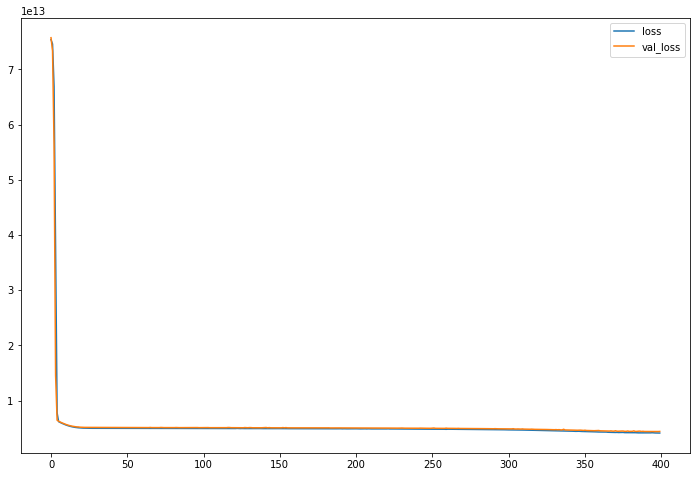

In [ ]:
# Loss function graph.
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

52/52 [==============================] - 0s 2ms/step
MAE: 1663975.6828675577
MSE: 4401654256046.85
RMSE: 2098011.9770980454
VarScore: 0.5774194953089654
R2 Score: 0.5772492374260718


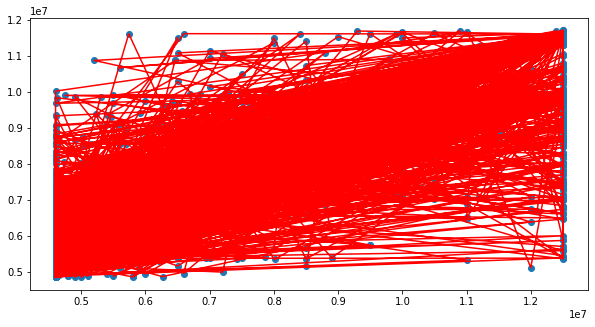

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_pred,'r')

In [ ]:
y_test

21147    12500000.0
21390     4599250.0
20577     8900000.0
22248     4599250.0
9565     12500000.0
            ...    
9046      8700000.0
20998     8000000.0
7954      6834999.0
28097     4599250.0
388       4599250.0
Name: Price, Length: 1646, dtype: float64

In [ ]:
y_pred

array([[11689178. ],
       [ 7845377. ],
       [ 8058458. ],
       ...,
       [ 7683821. ],
       [ 5364731. ],
       [ 6911149.5]], dtype=float32)

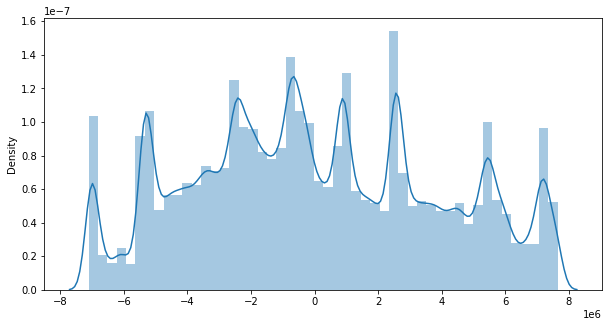

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test.values - y_pred)
sns.distplot(residuals)

In [ ]:
#residuals = y_test.values - y_pred

In [ ]:
#sns.distplot(residuals)